# Project 1 Report

Joshua Cook


## Modeling the Kinematics of the Robots

**1a**: Find out the equation describing the relationship between the rpm of the wheels, $\omega_{wheel}$, and the forward velocity of the robot, $v$, with the given parameters. The radius of the wheels is 1.5cm.

\begin{align}
1 \text{ revolution per minute} &= 2\pi\cdot \text{ radius} \text{ per minute}\\
&= 2 \pi \cdot 1.5 \frac{\text{cm}}{\text{minute}}\\
&= 5 \pi \times 10^{-4} \frac{\text{m}}{\text{second}}
\end{align}

**1b:** Find out the relationship between the translational velocity of the wheels, $v_{wheel}$, and the angular velocity of the robot, $\omega$, assuming the wheels are rotating in opposite directions and with the same speed.

Per [Robotarium Website](https://www.robotarium.gatech.edu/faq):

> The robots are 11 cm wide, 10 cm long, and 7cm tall. However, the robots are much taller when considering the antenna and tracking markers.

Then, the radius is 5.5 cm. 

\begin{align}
\omega_{robot} = \frac{d\theta}{dt} &= \frac{v_\perp}{r}\\
&= \frac{v_{wheel} m/s}{5.5\text{ cm}} = 18.2 \cdot v_{wheel} \ rads/s
\end{align}

**2:** Describe the feedback control loop for controlling the orientation, $\theta$, of the robots along a path used in the Robotarium using a block diagram. That is, a desired orientation is commanded and thus should be your input. Make sure to start with the input and end with the output in order to have a complete diagram.

![](https://www.evernote.com/l/AAEixlE0cwJNh4n6-8f2ZnuuZahFyQ6bi2oB/image.png)


**3:** Give brief descriptions of the sensor, actuator and controller. What do they do? Relate these components to the actual relevant functions in the Matlab code.

- **controller**, takes the *orientation error*, that is the difference between the *measured orientation* and the *target orientation* and uses this to prepare *movement instructions*, a unicycle dynamics vector, $u = \left(v, \omega\right)$ 
- **actuator**, take the *movement instructions* and uses them to drive the motion of the robot. This results in the robot being in a new position, including for this cycle, a *new orientation*
- **sensor**, reads the *new orientation* of the robot and combines this with the input, the *target orientation* to generate the *orientation error*

## Simulation

Indicate the number of iterations needed in Simulation Task 3

### Load the data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io as sio

%matplotlib inline

project_1_data = pd.DataFrame(sio.loadmat('../data/project-1-5-data.mat')["data"]).T
project_1_data["time"] = project_1_data.index + 1
project_1_data.columns = ["x", "y", "theta", "v", "omega", "time"]

### Identify the $u = \vec{0}$ Transitions

There are six transitions with $u = \vec{0}$. 

1. After completing task 2
2. After re-orienting to target 2
3. After completing task 3
4. After re-orienting to target 1
5. After completing task 4
6. After re-orienting to target 2

There is no final $u = \vec{0}$ as the program terminates after completing task 5. 

In [102]:
project_1_data[(project_1_data.v == 0) & (project_1_data.omega == 0)]

,x,y,theta,v,omega,time
329,-0.503865,0.008518,-1.223,0.0,0.0,330
373,-0.499141,-0.002173,-0.010,0.0,0.0,374
754,0.520453,0.113406,0.091,0.0,0.0,755
818,0.548135,0.117221,3.133,0.0,0.0,819
1225,-0.493232,-0.000463,-3.082,0.0,0.0,1226
1295,-0.507129,0.000725,-0.007,0.0,0.0,1296


The number of rows can be taken as the final time_index.

In [103]:
project_1_data.tail()

,x,y,theta,v,omega,time
1682,0.483762,0.001716,-0.036,0.026666,-0.069265,1683
1683,0.485759,0.001750,-0.037,0.026665,-0.085256,1684
1684,0.486759,0.001750,-0.037,0.026665,-0.094385,1685
1685,0.487759,0.001750,-0.037,0.026665,-0.104977,1686
1686,0.489759,0.001750,-0.037,0.026665,-0.132212,1687


Based on this, the agent begins task 3 at time index 375 and completes task 3 at time index 754.

**Total Iterations to complete Task 3: 379**

This is reasonable as the agent has a velocity of 0.08 m/s, each iteration is 0.033 seconds, and the agent must travel one meter.

In [6]:
379*0.033*.08

1.0005600000000001

## Data Analysis

**1:** Plot the experiment position data of Task 3 and Task 5 on the same Y vs X plot.

**2:** Plot the distance to the target position of Task 3 and Task 5 against the number of iterations (normalized from 0) on the same plot.

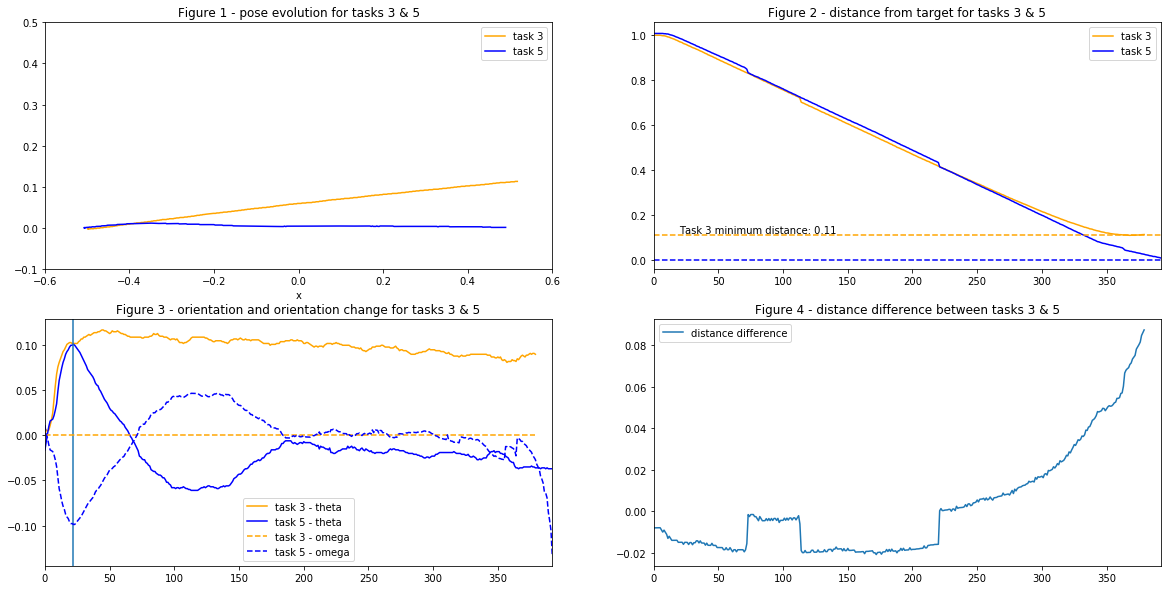

In [98]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))
task_3_begin, task_3_end = 375, 754
task_5_begin, task_5_end = 1295, 1687

task_3_data = project_1_data[(project_1_data.time >= task_3_begin) & (project_1_data.time <= task_3_end)].copy().reset_index()
task_5_data = project_1_data[(project_1_data.time >= task_5_begin) & (project_1_data.time <= task_5_end)].copy().reset_index()
task_3_data.plot(x="x", y="y", c="orange", label="task 3", ax=ax[0][0])
task_5_data.plot(x="x", y="y", c="blue", label="task 5", ax=ax[0][0])
ax[0][0].set_xlim(-0.6, 0.6)
ax[0][0].set_ylim(-0.1, 0.5)

task_3_data["distance"] = task_3_data.apply(lambda row: np.linalg.norm(np.array((row.x, row.y)) - np.array((0.5, 0))), axis=1)
task_5_data["distance"] = task_5_data.apply(lambda row: np.linalg.norm(np.array((row.x, row.y)) - np.array((0.5, 0))), axis=1)

task_3_data["distance"].plot(label="task 3", c="orange", ax=ax[0][1])
task_5_data["distance"].plot(label="task 5", c="blue", ax=ax[0][1])
ax[0][1].axhline(task_3_data.distance.min(), ls="--", c="orange")
ax[0][1].text(20,0.12, f"Task 3 minimum distance: {round(task_3_data.distance.min(), 2)}")
ax[0][1].axhline(0, ls="--", c="blue")

task_3_data["theta"].plot(label="task 3 - theta", c="orange", ax=ax[1][0])
task_5_data["theta"].plot(label="task 5 - theta", c="blue", ax=ax[1][0])
ax[1][0].axvline(task_5_data[task_5_data.theta == task_5_data.theta.max()].index.values[0])

task_3_data["omega"].plot(label="task 3 - omega", ls="--", c="orange", ax=ax[1][0])
task_5_data["omega"].plot(label="task 5 - omega", ls="--", c="blue", ax=ax[1][0])
(task_3_data.distance - task_5_data.distance).plot(ax=ax[1][1], label="distance difference")
# task_3_data["v"].plot(label="task 3", c="orange", ax=ax[1])
# task_5_data["v"].plot(label="task 5", c="blue", ax=ax[1])

ax[0][0].legend()
ax[0][1].legend()
ax[1][0].legend()
ax[1][1].legend()

ax[0][0].set_title("Figure 1 - pose evolution for tasks 3 & 5")
ax[0][1].set_title("Figure 2 - distance from target for tasks 3 & 5")
ax[1][0].set_title("Figure 3 - orientation and orientation change for tasks 3 & 5")
ax[1][1].set_title("Figure 4 - distance difference between tasks 3 & 5");

**3:** Discuss and explain what you see in the plots.

#### Task 5 Achieves The Target
In Figure 2, we can see that the final distance from the target is very nearly 0 for the agent during task 5.

#### Task 3 Misses The Target
In Figure 1, we can see that the agent misses the target in task 3. In Figure 2, we can see that the distance from the target never drops below 0.11 in Task 3. In Figure 1, we note that the agent appears to travel very nearly in a straight line throughout the task 3. Based on this we can attribute the missing of the target to a divergent orientation at the outset.

#### Divergent Orientation At Outset
In Figure 3, we note the despite beginning with an orientation of $\theta=0$, the agent rapidly diverges to $\theta=0.1$ while attempting both Task 3 and Task 5. The closed loop control approach fixes this issue as can be seen in Figures 1 and 3, where the positions (Figure 1) and orientation, $\theta$ (Figure 3) of the agent during tasks 3 and 5 line up for this beginning period, but are repaired by the agent.

#### Task 5 Takes Slightly Longer Than Task 3
In both Figures 2 and 3, we can see that Task 5 uses slightly more time steps than does Task 3. It is important to note that Task 5 uses a modification to its velocity, cutting it's velocity to one third when the distance drops below a certain threshold. 

This was implemented in Matlab as follows, where `reasonable_speed` is set to 0.08 m/s and `turn_angle` is computed by the closed loop control algorithm:

```
if distance < 0.1
    u = [reasonable_speed/3; turn_angle];
else
    u = [reasonable_speed; turn_angle];
end
```

#### Distance Differential is Stable Until End of Task

In Figure 2, we can see that distance trajectories are very similar during both tasks until near the end. In Figure 4 we compare the differential between Tasks 3 and 5. We see that this differential is largely stable until approximately time index 220, when it rapidly shoots up.

#### The Agent Leads To The Right

In Figure 3, we can see that the agent leads slightly to the right. We can note the downward trend of $\theta$ in task 3 from time index 25 and in task 5 from approx time index 180.